## Predict :- Monthly Rent

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Loading DataSet
df = pd.read_csv('99acres_data.csv')
df

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0
2,mumbai,60000.0,2.0,2 Baths,950,Super built-up Area,Residential,Wadala,200000.0
3,mumbai,52000.0,3.0,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000.0
4,mumbai,30000.0,1.0,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000.0
...,...,...,...,...,...,...,...,...,...
146523,Trivandraum,10000.0,2.0,3 Baths,1200,Built-up Area,Independent,Anayara,25000.0
146524,Trivandraum,21000.0,2.0,2 Baths,1155,Carpet Area,Residential,Kazhakkoottam,50000.0
146525,Trivandraum,10000.0,2.0,2 Baths,861,Built-up Area,Residential,Vattiyoorkkav,30000.0
146526,Trivandraum,33000.0,4.0,5 Baths,3200,Plot Area,Independent,Pattom,150000.0


In [3]:
df.describe()

,monthly_rant,BHKS,sqft_per_inch,deposit
count,1.465280e+05,146528.000000,1.465280e+05,1.465280e+05
mean,3.414242e+04,2.159703,2.463806e+03,1.203667e+05
std,8.428243e+04,1.107673,1.816119e+05,2.937736e+05
min,5.000000e+02,1.000000,1.000000e+00,0.000000e+00
25%,1.300000e+04,1.000000,6.800000e+02,3.000000e+04
50%,2.000000e+04,2.000000,1.057000e+03,6.000000e+04
75%,3.290000e+04,3.000000,1.500000e+03,1.250000e+05
max,9.917000e+06,95.000000,4.356000e+07,2.100000e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146528 entries, 0 to 146527
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   city                      146528 non-null  object 
 1   monthly_rant              146528 non-null  float64
 2   BHKS                      146528 non-null  float64
 3   Baths                     146528 non-null  object 
 4   sqft_per_inch             146528 non-null  int64  
 5   build_up_area             146528 non-null  object 
 6   Type_of_property          146528 non-null  object 
 7   location_of_the_property  146528 non-null  object 
 8   deposit                   146528 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 10.1+ MB


In [5]:
df['Baths'] = df['Baths'].str.split(" ", n = 2, expand = True)[0]

In [6]:
df.Baths.unique()

array(['2', '3', '1', '5', '4', '10', '6', 'RK\n1', 'Baths', 'Bath', '9',
       '15', '76', '8', '7', '12', 'BHK', '22', '16', '20', '17', '13',
       '11', '18', '30', '24', '14', '23', '59', '48', 'RK', '40', '98',
       '19', '26', '35', '28', '21', '37', '27', '50'], dtype=object)

## Data Visulization

Numbers Of Area Type :

Super built-up Area    69918
Carpet Area            36847
Built-up Area          29104
Plot Area              10659
Name: build_up_area, dtype: int64


<AxesSubplot:xlabel='build_up_area', ylabel='count'>

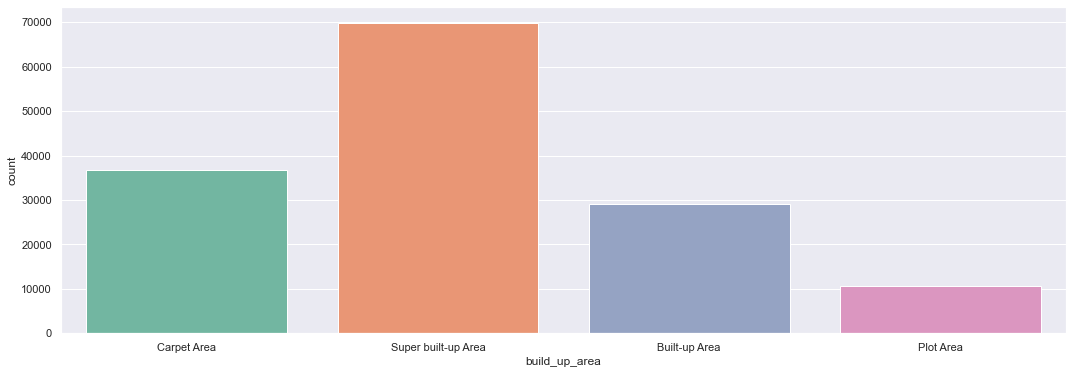

In [7]:
print("Numbers Of Area Type :")
print()
print(df['build_up_area'].value_counts())
sns.set(rc = {'figure.figsize':(18,6)})
sns.countplot(x='build_up_area', data=df, palette = 'Set2')

Types of Property :

Residential    102024
Independent     41243
Studio           2606
Serviced          363
Farm              161
for               118
Floor              13
Name: Type_of_property, dtype: int64


<AxesSubplot:xlabel='Type_of_property', ylabel='count'>

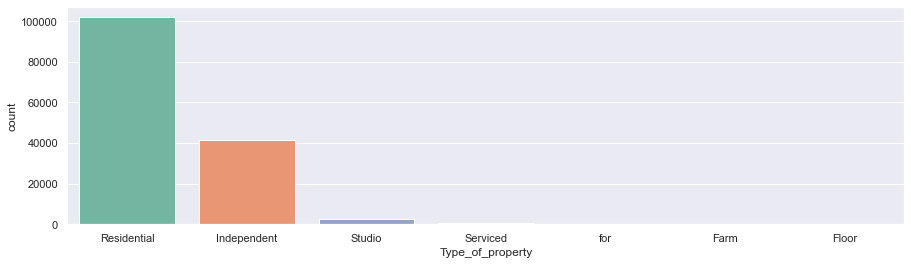

In [8]:
print("Types of Property :")
print()
print(df['Type_of_property'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='Type_of_property', data=df, palette = 'Set2')

Property Located Based On City :- 

ncr            42016
mumbai         37566
bangalore      25600
pune           18176
chennai         9973
hyderabad       7131
Ahmedabad       5602
Trivandraum      464
Name: city, dtype: int64


<AxesSubplot:xlabel='city', ylabel='count'>

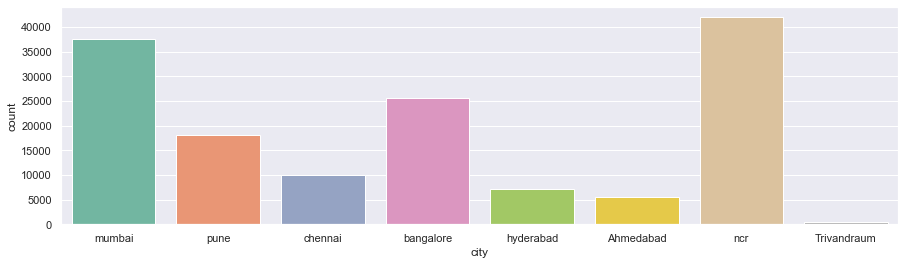

In [9]:
print("Property Located Based On City :- ")
print()
print(df['city'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='city', data=df, palette = 'Set2')

Property Located Based On City :- 

city       location_of_the_property
Ahmedabad  South Bopal                 542
           Satellite                   372
           Vaishnodevi Circle          240
           Thaltej                     232
           Gota                        227
                                      ... 
pune       wadheshwar nagar              1
           wakad                         1
           wakad ,pune                   1
           wakad bridge                  1
           yerwada                       1
Name: location_of_the_property, Length: 12859, dtype: int64


<AxesSubplot:xlabel='city', ylabel='count'>

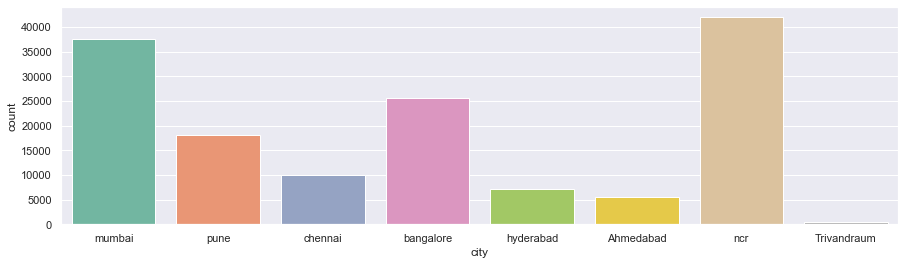

In [10]:
print("Property Located Based On City :- ")
print()
print(df.groupby('city')['location_of_the_property'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='city', data=df, palette = 'Set2')

### Checking Correlation

In [11]:
df.corr()

,monthly_rant,BHKS,sqft_per_inch,deposit
monthly_rant,1.000000,0.328428,0.002948,0.635764
BHKS,0.328428,1.000000,0.002898,0.341362
sqft_per_inch,0.002948,0.002898,1.000000,0.002275
deposit,0.635764,0.341362,0.002275,1.000000


In [12]:
corr = df.corr()

<AxesSubplot:>

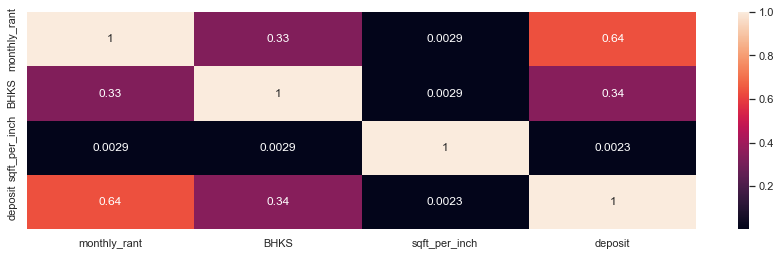

In [13]:
sns.heatmap(corr,annot=True)

## Column Baths

In [14]:
# Droping a features
df.drop('Baths',axis=1,inplace=True)

## Column Deposite

In [15]:
#Checking Null values
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

In [16]:
# How many unique categories is there
df.build_up_area.unique()

array(['Carpet Area', 'Super built-up Area', 'Built-up Area', 'Plot Area'],
      dtype=object)

In [17]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0


## Column Type Of Property

In [18]:
# Checking Unique Values
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Serviced', 'for', 'Farm',
       'Floor'], dtype=object)

In [19]:
#df['Type_of_property'] = df['Type_of_property'].str.replace("for",' ')

In [20]:
df.shape

(146528, 8)

### Filtering DataSet

In [21]:
# Removing for
df = df[df.Type_of_property!='for']
df.shape

(146410, 8)

In [22]:
# Removing Serviced
df = df[df.Type_of_property!='Serviced']
df.shape


(146047, 8)

In [23]:
# removing floor
df = df[df.Type_of_property!='Floor']
df.shape

(146034, 8)

In [24]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Farm'], dtype=object)

In [25]:
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

## -----------------------------------------------------------------------------------------------------------------------------

## Outlier Treatment
### deposit

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit'>

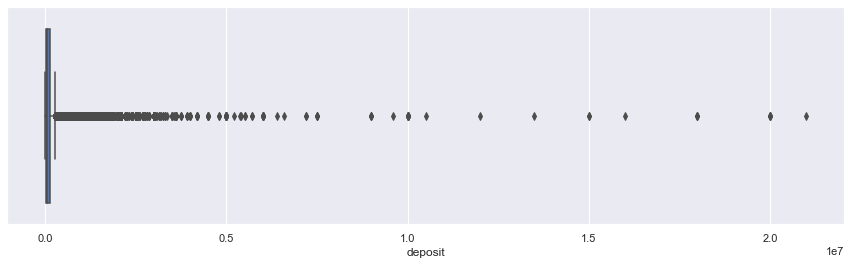

In [26]:
sns.boxplot(df['deposit'])

In [27]:
df['deposit'] = np.log(df['deposit']+1)

In [28]:
Q1 = df['deposit'].quantile(0.25)
Q3 = df['deposit'].quantile(0.75)
IQR = Q3 - Q1

In [29]:
((df['deposit'] < (Q1 - 1.5 * IQR)) | (df['deposit'] > (Q3 + 1.5 * IQR))).mean()

mask = (df['deposit'] < (Q1 - 1.5 * IQR)) | (df['deposit'] > (Q3 + 1.5 * IQR))
df[mask] = np.nan

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit'>

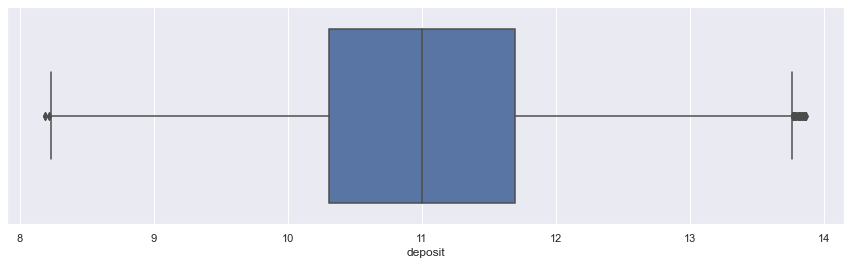

In [30]:
sns.boxplot(df['deposit'])

* We clearly observed in boxplot data is right skewed

In [31]:
df.isnull().sum()

city                        2263
monthly_rant                2263
BHKS                        2263
sqft_per_inch               2263
build_up_area               2263
Type_of_property            2263
location_of_the_property    2263
deposit                     2263
dtype: int64

In [32]:
df.dropna(inplace=True)

<AxesSubplot:>

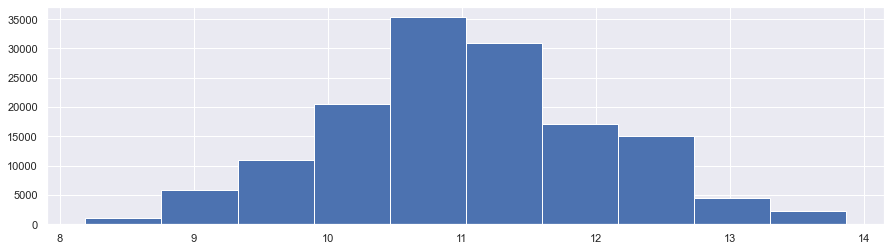

In [33]:
df['deposit'].hist()

In [34]:
#df['deposit']=df['deposit']**(1/2)
#df['deposit'].hist()

In [35]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470.0,Carpet Area,Residential,Kolshet Road,11.225257
1,mumbai,75000.0,3.0,1800.0,Super built-up Area,Residential,Sector 21 Nerul,12.899222


## sqft_per_inch

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_per_inch'>

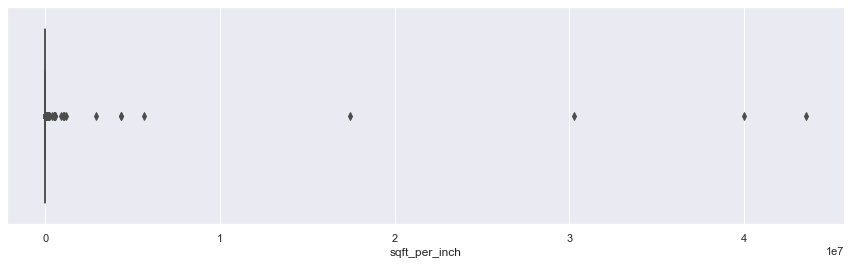

In [36]:
sns.boxplot(df.sqft_per_inch)

In [37]:
Q1 = df['sqft_per_inch'].quantile(0.25)
Q3 = df['sqft_per_inch'].quantile(0.75)
IQR = Q3 - Q1

In [38]:
((df['sqft_per_inch'] < (Q1 - 1.5 * IQR)) | (df['sqft_per_inch'] > (Q3 + 1.5 * IQR))).mean()

mask = (df['sqft_per_inch'] < (Q1 - 1.5 * IQR)) | (df['sqft_per_inch'] > (Q3 + 1.5 * IQR))
df[mask] = np.nan

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_per_inch'>

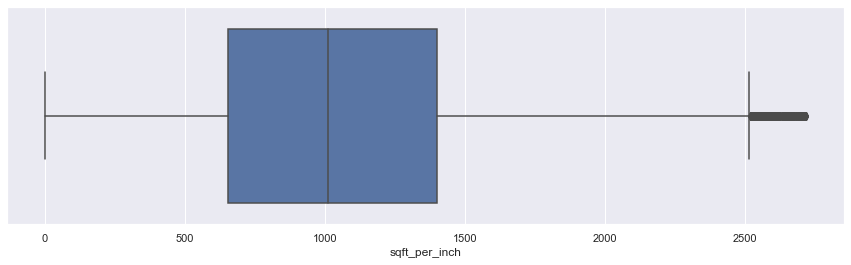

In [39]:
sns.boxplot(df.sqft_per_inch)

In [40]:
df.isnull().sum()

city                        6755
monthly_rant                6755
BHKS                        6755
sqft_per_inch               6755
build_up_area               6755
Type_of_property            6755
location_of_the_property    6755
deposit                     6755
dtype: int64

In [41]:
df.dropna(inplace=True)

In [42]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470.0,Carpet Area,Residential,Kolshet Road,11.225257
1,mumbai,75000.0,3.0,1800.0,Super built-up Area,Residential,Sector 21 Nerul,12.899222


In [43]:
df.drop('location_of_the_property',axis=1,inplace=True)

# --------------------------------------------------------------------------------------------------------

In [44]:
df.shape

(137016, 7)

In [45]:
df.skew()

monthly_rant     99.327773
BHKS              1.515366
sqft_per_inch     0.726170
deposit          -0.007746
dtype: float64

## Data Transformation

In [46]:
df['monthly_rant'] = np.log(df['monthly_rant']+1)

In [47]:
df.skew()

monthly_rant     0.602061
BHKS             1.515366
sqft_per_inch    0.726170
deposit         -0.007746
dtype: float64

In [48]:
df.BHKS.max(), df.BHKS.min()

(32.0, 1.0)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137016 entries, 0 to 146527
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   city              137016 non-null  object 
 1   monthly_rant      137016 non-null  float64
 2   BHKS              137016 non-null  float64
 3   sqft_per_inch     137016 non-null  float64
 4   build_up_area     137016 non-null  object 
 5   Type_of_property  137016 non-null  object 
 6   deposit           137016 non-null  float64
dtypes: float64(4), object(3)
memory usage: 8.4+ MB


# Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

cty = LabelEncoder()
b_u_a = LabelEncoder()
T_o_p = LabelEncoder()
#l_o_t_p = LabelEncoder()


df['city'] = cty.fit_transform(df['city'])
df['build_up_area'] = b_u_a.fit_transform(df['build_up_area'])
df['Type_of_property'] = T_o_p.fit_transform(df['Type_of_property'])
#df['location_of_the_property'] = l_o_t_p.fit_transform(df['location_of_the_property'])


In [51]:
print("city",df['city'].unique())
print(cty.inverse_transform(list(df['city'].unique())))
print()
print("build_up_area:",df['build_up_area'].unique())
print(b_u_a.inverse_transform(list(df['build_up_area'].unique())))
print()
print("Type_of_property", df['Type_of_property'].unique())
print(T_o_p.inverse_transform(list(df['Type_of_property'].unique())))
print()
#print("location_of_the_property",df['location_of_the_property'].unique())
#print(l_o_t_p.inverse_transform(list(df['location_of_the_property'].unique())))


city [5 7 3 2 4 0 6 1]
['mumbai' 'pune' 'chennai' 'bangalore' 'hyderabad' 'Ahmedabad' 'ncr'
 'Trivandraum']

build_up_area: [1 3 0 2]
['Carpet Area' 'Super built-up Area' 'Built-up Area' 'Plot Area']

Type_of_property [2 1 3 0]
['Residential' 'Independent' 'Studio' 'Farm']



In [52]:
df.head()

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,deposit
0,5,9.770013,1.0,470.0,1,2,11.225257
1,5,11.225257,3.0,1800.0,3,2,12.899222
2,5,11.002117,2.0,950.0,3,2,12.206078
3,5,10.859018,3.0,1300.0,1,2,12.611541
4,5,10.308986,1.0,550.0,0,2,11.918397


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137016 entries, 0 to 146527
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   city              137016 non-null  int32  
 1   monthly_rant      137016 non-null  float64
 2   BHKS              137016 non-null  float64
 3   sqft_per_inch     137016 non-null  float64
 4   build_up_area     137016 non-null  int32  
 5   Type_of_property  137016 non-null  int32  
 6   deposit           137016 non-null  float64
dtypes: float64(4), int32(3)
memory usage: 6.8 MB


## ---------------------------------Modeling----------------------------------------

In [54]:
#Seperating the variable Independent matrix X and dependent Vector y

X = df.drop('monthly_rant',axis=1)
y = df.monthly_rant

In [55]:
X.head(2)

,city,BHKS,sqft_per_inch,build_up_area,Type_of_property,deposit
0,5,1.0,470.0,1,2,11.225257
1,5,3.0,1800.0,3,2,12.899222


In [56]:
y.head(2)

0     9.770013
1    11.225257
Name: monthly_rant, dtype: float64

In [57]:
# Spliting the data into Training set & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [58]:
X_train.shape

(109612, 6)

In [59]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
y_predict=forest.predict(X_test)
y_predict_train=forest.predict(X_train)

In [61]:
from sklearn.metrics import r2_score

print('Random Forest Train r2_score',r2_score(y_train,y_predict_train))
print('Random Forest Test r2_score',r2_score(y_test,y_predict))

Random Forest Train r2_score 0.9531721766943883
Random Forest Test r2_score 0.8779015535164995


In [62]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [63]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 200]},
                   random_state=42, verbose=2)

In [64]:
y_pred=rf_random.predict(X_test)
y_pred_train=rf_random.predict(X_train)

## Checking Performance of the Model

In [65]:
from sklearn.metrics import r2_score

print('Random Forest Train r2_score',r2_score(y_train,y_pred_train))
print('Random Forest Test r2_score',r2_score(y_test,y_pred))

Random Forest Train r2_score 0.922772713779628
Random Forest Test r2_score 0.8883095969322523


In [67]:
rf_random.predict([[5,3.0,1800.0,3,2,12.899222]])

array([11.32414449])

# -------------------------------------------------------------------------------------------------------------

## Save Model

In [68]:
import pickle

In [ ]:
# Saving the model
#pickle.dump(rf_random, open('rf_rand_model.pkl','wb'))

In [69]:
model = pickle.load(open('rf_rand_model.pkl','rb'))
print(model.predict([[5,1.0,470.0,1,2,11.225257]]))

[9.82286697]
